# 1. Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

Instructions for updating:
non-resource variables are not supported in the long term


# 数据准备

In [3]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [7]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷积层1

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),#32个3*3卷积核（滤波器）
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [12]:
model.add(Dropout(rate=0.25))#Dropout(随机丢弃) 缓解过拟合

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))#降采样，减少参数，扩大视野

In [14]:
#卷积层2+最大池化

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#Step3	建模

In [19]:
model.add(Flatten())#将多维压缩为扁平的一维
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(1024, activation='relu'))#隐藏层
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10, activation='softmax'))#输出层

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 载入之前训练的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("载入模型成功!继续训练模型")
except :    
    print("载入模型失败!开始训练一个新模型")

载入模型失败!开始训练一个新模型


# 训练模型

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - ETA: 0s - loss: 1.5002 - acc: 0.4578

D:\Program\anaconda\envs\pytorch\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


40000/40000 [==============================] - 16s 402us/sample - loss: 1.5002 - acc: 0.4578 - val_loss: 1.2761 - val_acc: 0.5818
Epoch 2/10
40000/40000 [==============================] - 16s 391us/sample - loss: 1.1465 - acc: 0.5935 - val_loss: 1.1159 - val_acc: 0.6368
Epoch 3/10
40000/40000 [==============================] - 17s 417us/sample - loss: 0.9983 - acc: 0.6478 - val_loss: 1.0576 - val_acc: 0.6472
Epoch 4/10
40000/40000 [==============================] - 16s 398us/sample - loss: 0.8996 - acc: 0.6825 - val_loss: 0.9593 - val_acc: 0.6891
Epoch 5/10
40000/40000 [==============================] - 16s 402us/sample - loss: 0.8049 - acc: 0.7168 - val_loss: 0.8900 - val_acc: 0.6999
Epoch 6/10
40000/40000 [==============================] - 16s 395us/sample - loss: 0.7290 - acc: 0.7427 - val_loss: 0.8593 - val_acc: 0.7198
Epoch 7/10
40000/40000 [==============================] - 16s 395us/sample - loss: 0.6469 - acc: 0.7756 - val_loss: 0.8355 - val_acc: 0.7222
Epoch 8/10
40000/40000 [

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
show_train_history('acc','val_acc')

In [1]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

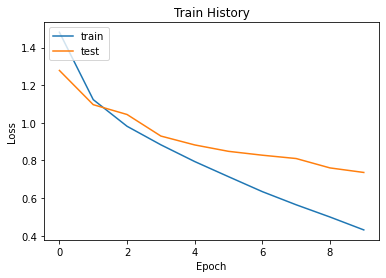

In [52]:
show_train_history('loss','val_loss')

# 评估模型准确率

In [29]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7398

# 进行预测

In [30]:
prediction=model.predict_classes(x_img_test_normalize)

C:\Users\ham\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\ham\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2355: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [31]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

# 查看预测结果

In [32]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [33]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

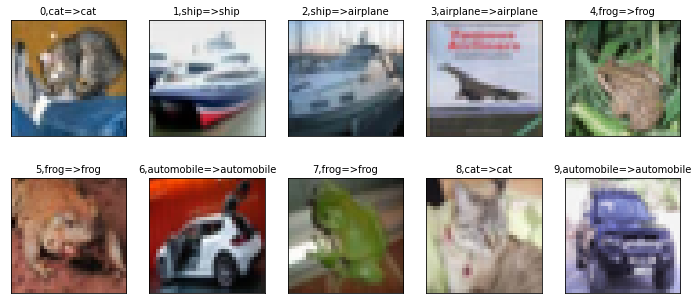

In [34]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看预测概率

In [35]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [36]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


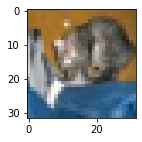

airplane Probability:0.004091088
automobile Probability:0.000559151
bird Probability:0.010424050
cat Probability:0.666496277
deer Probability:0.015878022
dog Probability:0.225031823
frog Probability:0.006164691
horse Probability:0.060029950
ship Probability:0.010643472
truck Probability:0.000681488


In [37]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


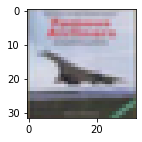

airplane Probability:0.835880280
automobile Probability:0.007178601
bird Probability:0.014214117
cat Probability:0.001358985
deer Probability:0.020686327
dog Probability:0.000002651
frog Probability:0.000039308
horse Probability:0.000022915
ship Probability:0.120287426
truck Probability:0.000329373


In [38]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [39]:
prediction.shape

(10000,)

In [40]:
y_label_test.shape

(10000, 1)

In [41]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [42]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [43]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,753,14,68,15,11,7,11,17,80,24
1,11,868,7,10,3,6,9,7,30,49
2,50,7,700,47,55,41,51,38,10,1
3,17,10,87,521,72,174,69,38,7,5
4,15,3,106,52,688,18,47,62,9,0
5,15,2,68,158,37,633,19,62,3,3
6,5,7,53,56,24,22,820,7,5,1
7,10,2,35,31,44,31,7,837,3,0
8,39,47,26,14,10,8,6,2,837,11


In [44]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [45]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [46]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [47]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
